<a href="https://colab.research.google.com/github/laugustovieira/BootCamp-Data-Science/blob/main/Desafios_Modulo1_Aula3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Aula 3

#Importar Bibliotecas

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

#Carregar informações

In [2]:
dados = pd.read_csv("/content/drive/MyDrive/Dados_BootCamp/A005117189_28_143_208_2021_ATENDIMENTO.csv", encoding="ISO-8859-1",
            sep=";", skiprows = 3, skipfooter = 12, engine = "python", thousands = ",", decimal = ".")

#Tratar Dados

In [3]:
pd.options.display.float_format = "{:.2f}".format


#Desafio 01 - Escolher uma palete de cores mais adequada do matplotlib.




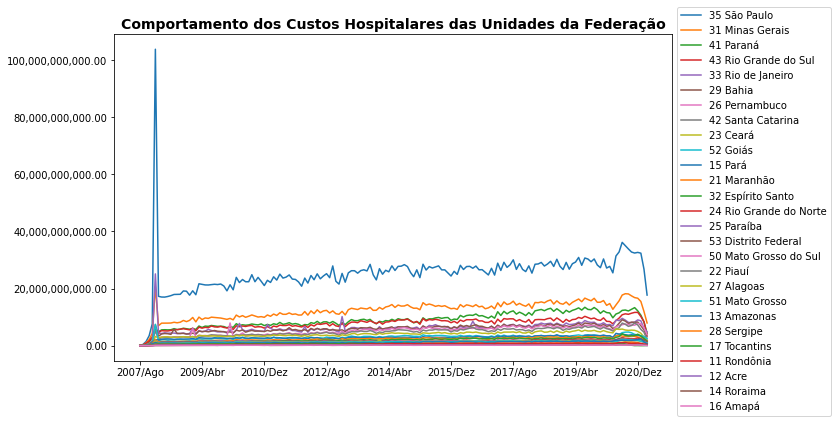

In [4]:
font = {'weight' : 'bold',
        'size'   : 14,
        'Color' : 'black'}
colunas_usaveis = dados.mean().index.tolist()
colunas_usaveis.insert(0,"Unidade da Federação")
usaveis = dados[colunas_usaveis]

usaveis = usaveis.set_index("Unidade da Federação")
usaveis = usaveis.nlargest(27, "Total")
usaveis= usaveis.drop("Total", axis=1)

ax = usaveis.T.plot(figsize=(10,6))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))
plt.legend(bbox_to_anchor=(1,1.1))
plt.title("Comportamento dos Custos Hospitalares das Unidades da Federação", fontdict=font)
sns.set_palette(sns.color_palette("gist_rainbow", 27))

#Desafio 02: Adicionar uma coluna mostrando a região (Norte, Nodeste, Sul, Suldeste e Centro-Oeste) de cada estado.

In [5]:

regioes = {'1': 'Norte', '2': 'Nordeste', '3': 'Sudeste', '4': 'Sul', '5': 'Centro-Oeste'}
estados = usaveis.index
usaveis["Regioes"] = list(map(lambda estado: regioes[estado[0]] , estados))

In [6]:
usaveis.head()

,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,...,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,Regioes
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
35 São Paulo,166534990,443416864,1457739584,3503225998,7666854741,103806742315,17296199958,17055669616,17033816323,17246205787,17549299585,17956991006,18000505015,18015165617,19185988440,19092726619,17709392351,19241205908,17864128475,21701173099,21512810789,21290521748,21271545571,21407935756,21526562554,21424987152,21611714569,20918397187,19215703774,21351279372,19578792641,23941137283,22120292985,23192277754,22404380874,22415773003,24876185509,22412103886,23935418552,22563905393,...,27965170180,25421907183,28534736795,28637190891,29167908716,27910217509,28615121615,29566908246,27768559312,30276655112,27826841972,26677032119,29189365529,26808352599,28715499464,29287054404,30914091540,28162176701,30719511845,30358411400,29408406768,30386635588,28279183307,27335749141,30386592727,27205069890,27793867453,25517874112,31427626303,32829358102,36198689625,35026867125,33887247849,32805582263,32459977340,32684622895,32411542570,26819306406,17740831771,Sudeste
31 Minas Gerais,97139437,286178150,1001801135,2173028163,4342951754,20620808090,7030108950,7911900551,7904632241,7926807012,7961918920,8220920698,8037411708,8240912930,8861347660,8448699611,8892863030,9901815584,8367511983,10025861686,9183132537,9728970307,9572339653,10005000870,9897718426,9820211908,9696239427,9476763913,9241277073,9580655642,9076489028,10738985003,10083595345,10549455031,9966611596,10336535752,10784425969,10434113819,10052540388,10194362550,...,14651060058,13073403129,15150678186,15070257227,15360488055,15026249913,15672191231,16048491869,14599861106,15729458662,14817278399,14542240628,15323642257,14269077252,15197619681,15795786620,16364109476,15417415349,16677591385,16177465877,15743783394,16616512518,15217150307,15247328115,15826577755,14146336042,14765494270,12744729037,14274628734,15727661650,17746663810,18217612299,18142250043,17458563828,16856470816,16637696767,15506448325,11987741715,7978083800,Sudeste
41 Paraná,55480022,143170801,463040244,1112003079,2879072287,5808133445,4885504646,5561179107,5611513582,5557483193,5609475474,5980240207,5669900113,5809198579,6136594122,5966720862,5781619774,6038159399,5723910163,6907048820,6405467826,6868554295,6793122706,7095876264,6922578396,6784996852,6855820928,6715849697,6309427428,6690264363,6450113364,7713887060,7075539699,7345675671,7183902089,7301383077,7615100695,7424096345,7304238670,7636475027,...,11613319349,10707598224,12233135451,12473134517,12708309002,12261692402,12799190080,13125716340,12064737743,12953016396,12181066926,11298463073,12415923968,11771547332,12390737222,12746450239,13260803980,12486587314,13470865918,12717438195,12620397657,13387060168,12622114081,11357383272,12233010196,11612574039,11477657127,9778406057,11101277038,11520371664,12385664055,12508946862,12177116711,12750608652,13344330736,12214625692,10694889753,8313017537,4348072907,Sul
43 Rio Grande do Sul,104925233,318291314,857131211,1659243280,3013425570,5106461003,4589770482,5292869592,5197241677,5167935079,5375967401,5639164777,5623375874,5791017098,5959212491,5756574208,5569692094,6152238002,5210163777,6511196549,6159082891,6440229162,6309064055,6913700488,6606262979,6522201132,6756940919,6418911530,6224428280,65488387

#Desafio 03: Formatar o gráfico de custos por mês dos 5 estados, deixando ele agradável (Bonitão, segundo o Gui)

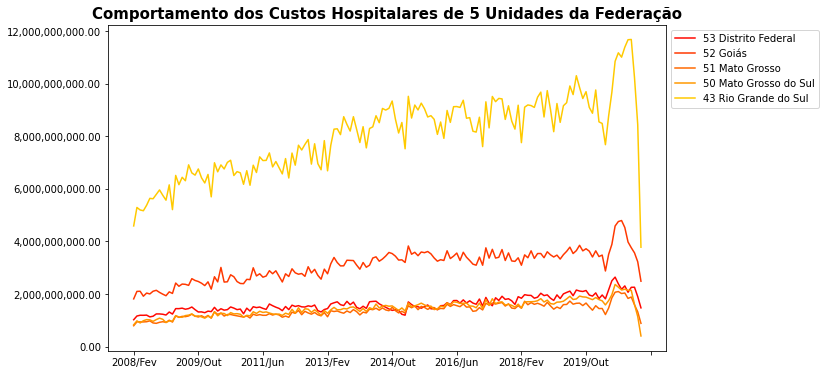

In [7]:
font = {'weight' : 'bold',
        'size'   : 15,
        'Color' : 'black'}

colunas_usaveis = dados.mean().index.tolist()
colunas_usaveis.insert(0,"Unidade da Federação")

usaveis = dados[colunas_usaveis]
usaveis= usaveis.drop("Total", axis=1)
usaveis = usaveis.set_index("Unidade da Federação")
usaveis_ordenado = usaveis.sort_values(by="Unidade da Federação", ascending=False)

coluna_cinco_estados = usaveis_ordenado.index.tolist()[:5]
usaveis_ordenado = usaveis_ordenado.loc[coluna_cinco_estados]
usaveis_ordenado = usaveis_ordenado[usaveis_ordenado.columns[6:]] 

ax = usaveis_ordenado.T.plot(figsize=(10,6))
plt.legend(bbox_to_anchor=(1,1))
sns.set_palette(sns.color_palette("tab10", 27))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))
plt.title("Comportamento dos Custos Hospitalares de 5 Unidades da Federação", fontdict=font)
plt.rc("xtick", labelsize=10)
plt.show()

#Desafio 04: Adicione o seu estado aos 5 estados plotados anteriormente

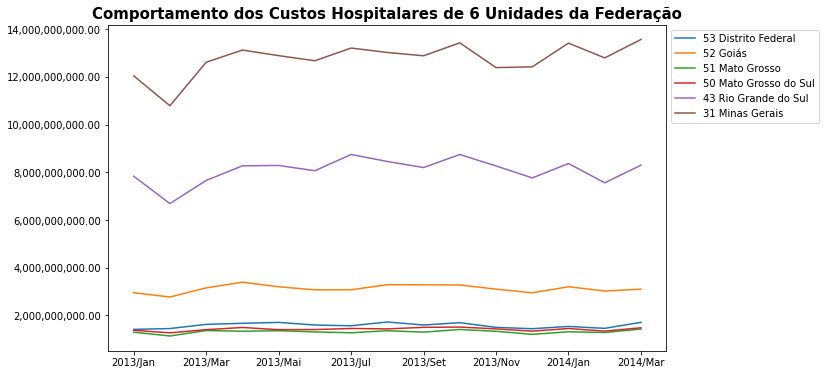

In [8]:
font = {'weight' : 'bold',
        'size'   : 15,
        'Color' : 'black'}

colunas_usaveis = dados.mean().index.tolist()
colunas_usaveis.insert(0,"Unidade da Federação")
usaveis = dados[colunas_usaveis]
usaveis= usaveis.drop("Total", axis=1)
usaveis = usaveis.set_index("Unidade da Federação")
usaveis_ordenado = usaveis.sort_values(by="Unidade da Federação", ascending=False)

coluna_cinco_estados = usaveis_ordenado.index.tolist()[:5]
coluna_cinco_estados.append("31 Minas Gerais")
#coluna_cinco_estados.append("35 São Paulo")

usaveis_ordenado = usaveis_ordenado.loc[coluna_cinco_estados]
usaveis_ordenado = usaveis_ordenado[usaveis_ordenado.columns[65:80]] 
ax = usaveis_ordenado.T.plot(figsize=(10,6))
sns.set_palette(sns.color_palette("Paired", 27))
plt.legend(bbox_to_anchor=(1,1))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))
plt.title("Comportamento dos Custos Hospitalares de 6 Unidades da Federação", fontdict=font)
plt.rc("xtick", labelsize=10)
plt.show()

#Desafio 05: Buscar os casos de dengue no Brasil (época de maior número de casos e regiões mais atingidas) e se os picos de alguns estados em fevereiro e verão de modo geral, pode ser reflexos dos casos de dengue

In [9]:
dados = pd.read_csv("/content/drive/MyDrive/Dados_BootCamp/A124715189_28_143_208.csv", encoding="ISO-8859-1",
            sep=";", skiprows = 3, skipfooter = 17, engine = "python", thousands = ",", decimal = ".")

colunas_usaveis = dados.mean().index.tolist()
colunas_usaveis.insert(0,"UF de notificação")
usaveis = dados[colunas_usaveis]
usaveis.set_index("UF de notificação")
usaveis.T


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26
UF de notificação,11 Rondônia,12 Acre,13 Amazonas,14 Roraima,15 Pará,16 Amapá,17 Tocantins,21 Maranhão,22 Piauí,23 Ceará,24 Rio Grande do Norte,25 Paraíba,26 Pernambuco,27 Alagoas,28 Sergipe,29 Bahia,31 Minas Gerais,32 Espírito Santo,33 Rio de Janeiro,35 São Paulo,41 Paraná,42 Santa Catarina,43 Rio Grande do Sul,50 Mato Grosso do Sul,51 Mato Grosso,52 Goiás,53 Distrito Federal
Jan,1972,750,2716,49,1411,243,1343,243,251,828,869,399,227,228,32,5122,32104,6207,13258,10329,4836,54,31,22646,8065,18232,590
Fev,2435,608,3549,54,1972,199,1711,475,437,1596,1040,886,339,324,48,10648,56053,9362,29534,26160,11847,59,69,22894,7828,26520,976
Mar,1764,445,3376,43,1908,270,1595,510,752,2326,1457,1204,645,519,47,16784,135922,15793,66212,66483,20380,60,146,16817,7192,31182,2981
Abr,750,192,2926,52,1687,491,1480,636,853,4738,2492,1838,1272,961,86,13620,139431,14414,61334,72124,18985,85,121,9482,5046,25067,4573
Mai,369,84,1598,127,787,218,976,546,736,4955,2490,2321,1419,1977,144,6651,35744,9995,24884,28720,6914,26,47,3805,2431,13113,4695
Jun,157,83,953,113,241,52,459,322,691,4278,2033,1820,928,1508,112,2715,8847,4094,6611,7552,1551,9,12,941,1051,5313,2557
Jul,116,68,642,108,107,37,190,192,557,4368,1900,1684,622,1385,69,1440,2107,2307,2380,2000,290,1,6,462,658,2137,1477
Ago,82,21,421,75,88,58,142,183,249,3542,1650,1237,475,859,48,877,813,1281,1093,776,103,3,7,196,423,1461,825
Set,75,23,293,119,96,34,105,167,179,1392,955,729,374,763,37,730,936,960,833,460,90,1,1,150,338,1111,381


In [10]:
usaveis

,UF de notificação,Jan,Fev,Mar,Abr,Mai,Jun,Jul,Ago,Set,Out,Nov,Dez,Total
0,11 Rondônia,1972,2435,1764,750,369,157,116,82,75,115,320,331,8486
1,12 Acre,750,608,445,192,84,83,68,21,23,21,72,103,2470
2,13 Amazonas,2716,3549,3376,2926,1598,953,642,421,293,317,309,456,17556
3,14 Roraima,49,54,43,52,127,113,108,75,119,79,69,45,933
4,15 Pará,1411,1972,1908,1687,787,241,107,88,96,115,259,270,8941
5,16 Amapá,243,199,270,491,218,52,37,58,34,39,32,10,1683
6,17 Tocantins,1343,1711,1595,1480,976,459,190,142,105,114,267,322,8704
7,21 Maranhão,243,475,510,636,546,322,192,183,167,78,64,74,3490
8,22 Piauí,251,437,752,853,736,691,557,249,179,115,77,108,5005
9,23 Ceará,828,1596,2326,4738,4955,4278,4368,3542,1392,725,645,582,29975
